Accept-Reject Method
====

This notebook contains code for reject-accept method with the following density:

$$f(x) = 0.6-0.3x^2$$

with the support $[-1,1]$. Note that the turning point for $f(x)$ is $(0, f(0))$ and 

$$\int^1_{-1} f(x) dx = 1.$$

Now consider a uniform distribution over the $[-1,1]$, $g(x)$, as the proposal density. This means $g(x)=0.5$ for all $x\in [-1,1]$. Set $k=1.2$ then $kg(x)$ is bounded above $f(x)$ for all $x\in [-1,1]$.  

In [3]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
from matplotlib import animation 

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]
plt.rcParams['animation.html'] = 'html5'

In [10]:
k=1.2
f = lambda x: 0.6-0.4*np.power(x,2)
xset = np.arange(-1,1,0.01)
g = k*0.5*np.ones(len(xset))

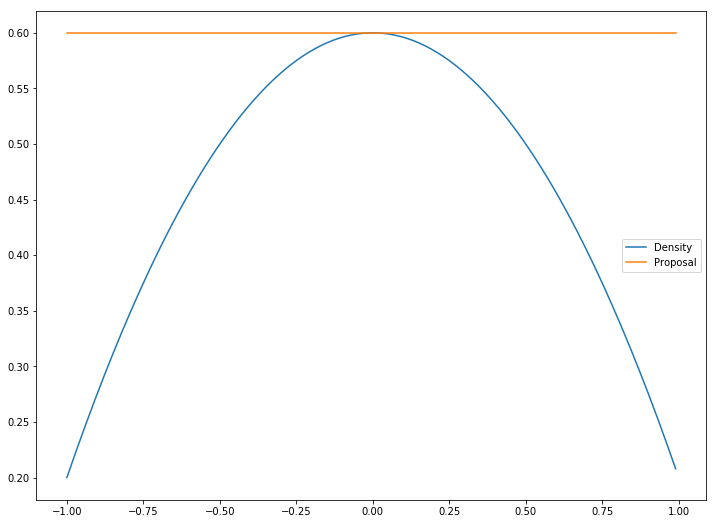

In [11]:
fset = np.array([f(x) for x in xset])
plt.plot(xset, fset)
plt.plot(xset, g)
plt.legend(['Density', 'Proposal'])

In [74]:
N = 100
n = 0
aset = []
accept =[]
reject = []
color_index = []
while n<N:
    x = sps.uniform.rvs(-1,2)
    candidate = sps.uniform.rvs(0,k*0.5)
    aset.append([x,candidate])
    if f(x) > candidate:
        accept.append([x,candidate])
        color_index.append(1)
        n = n + 1
    else:
        reject.append([x,candidate])
        color_index.append(0)
aset = np.array(aset)
accept = np.array(accept)
reject = np.array(reject)

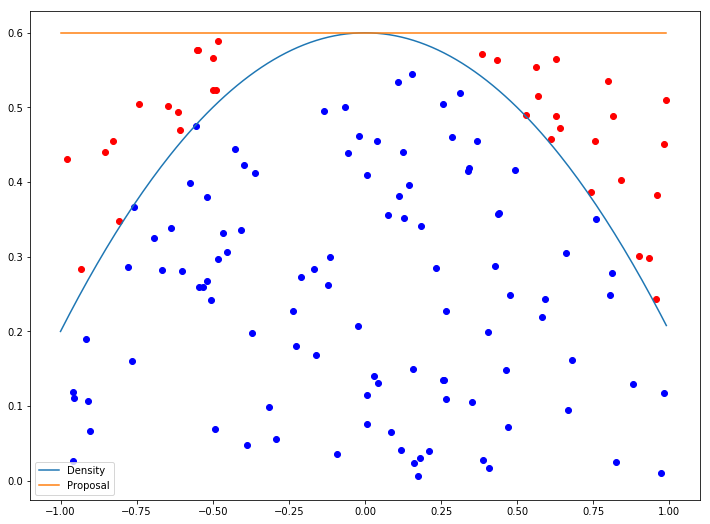

In [77]:
plt.plot(xset, fset)
plt.plot(xset, g)
plt.legend(['Density', 'Proposal'])
tempx = []
tempy = []
for a in reject:
    tempx.append(a[0])
    tempy.append(a[1])
plt.scatter(tempx,tempy,c='r')
tempx = []
tempy = []
for a in accept:
    tempx.append(a[0])
    tempy.append(a[1])
plt.scatter(tempx,tempy,c='b')

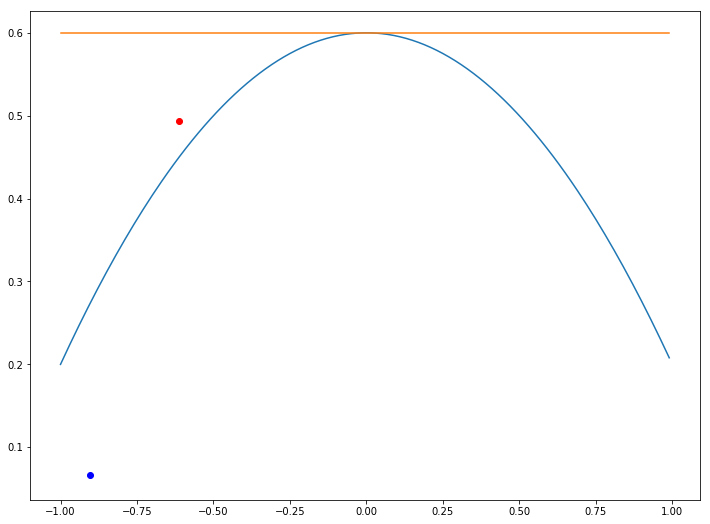

In [78]:
fig, ax = plt.subplots()
ax.plot(xset, fset)
ax.plot(xset, g)
ax_reject = ax.scatter(reject[0][0], reject[0][1], c='r')
ax_accept = ax.scatter(accept[0][0], accept[0][1], c='b')


In [80]:
def accept_reject(i):
    if color_index[i] == 0:
        ax.scatter(aset.transpose()[0][i], aset.transpose()[1][i], c='r')
    else:
        ax.scatter(aset.transpose()[0][i], aset.transpose()[1][i], c='b')

In [81]:
ani = animation.FuncAnimation(fig,accept_reject,frames=np.arange(len(aset)))
ani